<a href="https://colab.research.google.com/github/GenAIUnplugged/langchain_series/blob/main/Different_Retrieval_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langchain langchain-openai langchain-community chroma

In [ ]:
!pip install beautifulsoup4 requests

In [ ]:
from google.colab import userdata
import os
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

In [ ]:
from langchain_openai import ChatOpenAI
from langchain.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain.chains import RetrievalQA

In [ ]:
llm = ChatOpenAI(temperature=0.9,model="gpt-4o-mini")

In [ ]:
url = "https://en.wikipedia.org/wiki/Donald_Trump"

In [ ]:
from bs4 import BeautifulSoup
import requests

In [ ]:
def get_web_data():
  response = requests.get(url)
  if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    paragraphs = soup.find_all('p')
    text_content = '\n'.join([p.get_text() for p in paragraphs])
    return text_content

In [ ]:
get_web_data()

'\n\nDonald John Trump (born June 14, 1946) is an American politician, media personality, and businessman who is the 47th president of the United States. A member of the Republican Party, he served as the 45th president from 2017 to 2021.\n\nBorn into a wealthy family in the New York City borough of Queens, Trump graduated from the University of Pennsylvania in 1968 with a bachelor\'s degree in economics. He became the president of his family\'s real estate business in 1971, renamed it the Trump Organization, and began acquiring and building skyscrapers, hotels, casinos, and golf courses. He launched side ventures, many licensing the Trump name, and filed for six business bankruptcies in the 1990s and 2000s. From 2004 to 2015, he hosted the reality television show The Apprentice, bolstering his fame as a billionaire. Presenting himself as a political outsider, Trump won the 2016 presidential election against the Democratic Party\'s nominee, Hillary Clinton.\n\nDuring his first presiden

In [ ]:
from langchain.vectorstores import chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [ ]:
docs = get_web_data()

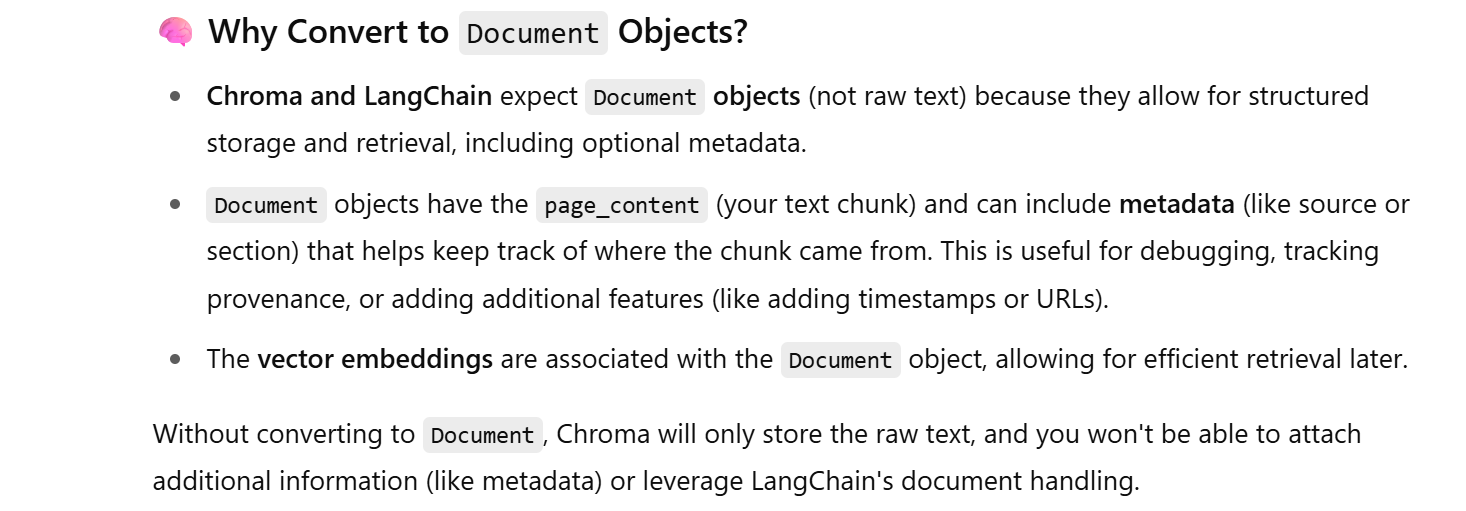

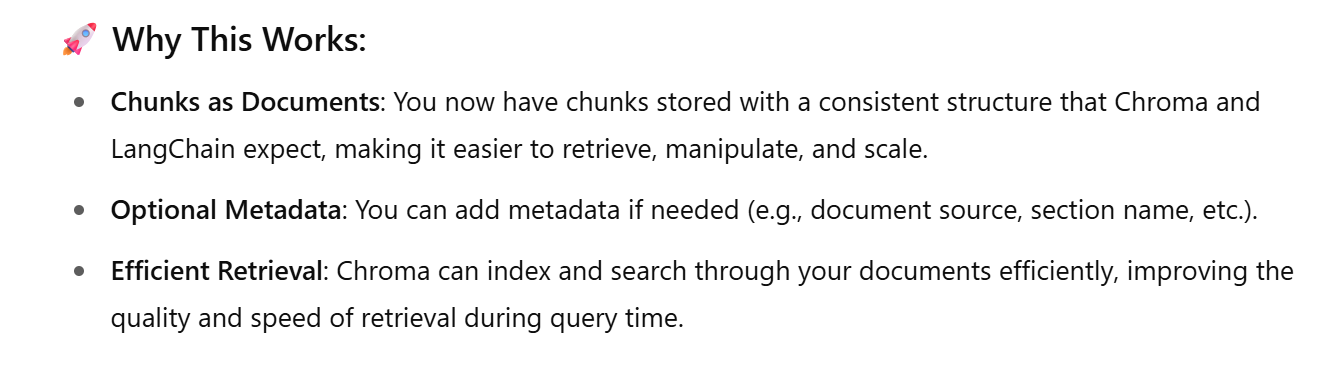

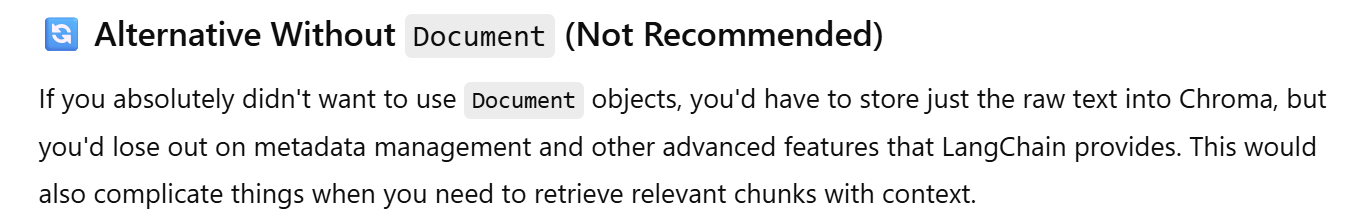

When you use PyPDFLoader or other similar loaders in LangChain (such as TextLoader, WebBaseLoader, etc.), the Document objects are automatically created during the load() process. These loaders are designed to process the raw content from files or URLs and convert them into structured Document objects that LangChain and vectorstores like Chroma can easily work with.

In [ ]:
from langchain.docstore.document import Document
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200,separators=["/n/n","/n","."])
chunks = text_splitter.split_text(docs)
docs = [Document(page_content=chunk) for chunk in chunks]

In [ ]:
docs[0]

Document(metadata={}, page_content="Donald John Trump (born June 14, 1946) is an American politician, media personality, and businessman who is the 47th president of the United States. A member of the Republican Party, he served as the 45th president from 2017 to 2021.\n\nBorn into a wealthy family in the New York City borough of Queens, Trump graduated from the University of Pennsylvania in 1968 with a bachelor's degree in economics. He became the president of his family's real estate business in 1971, renamed it the Trump Organization, and began acquiring and building skyscrapers, hotels, casinos, and golf courses. He launched side ventures, many licensing the Trump name, and filed for six business bankruptcies in the 1990s and 2000s. From 2004 to 2015, he hosted the reality television show The Apprentice, bolstering his fame as a billionaire. Presenting himself as a political outsider, Trump won the 2016 presidential election against the Democratic Party's nominee, Hillary Clinton")

In [ ]:
!pip install langchain-chroma

In [ ]:
from langchain.embeddings import OpenAIEmbeddings
from langchain_chroma import Chroma
embeddings = OpenAIEmbeddings()
vectorstores = Chroma.from_documents(docs,embeddings)

In [ ]:
retriever = vectorstores.as_retriever(search_type="mmr",search_kwargs={"k":3})

In [ ]:
from langchain.chains import ConversationalRetrievalChain

In [ ]:
from langchain.memory import ConversationBufferMemory
memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

In [ ]:
conversationchain = ConversationalRetrievalChain.from_llm(llm=llm,retriever=retriever,memory=memory)

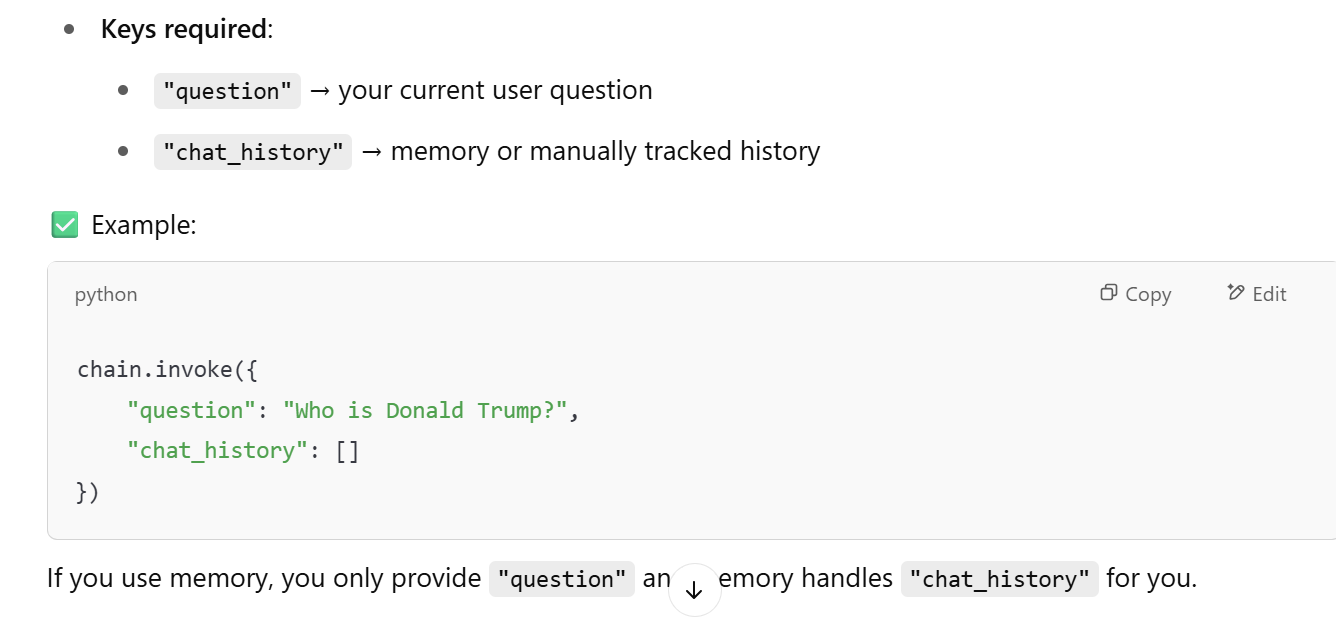

In [ ]:
response = conversationchain.invoke({"question":"Who is Donald Trump"})
response['answer']

"Donald John Trump is an American politician, media personality, and businessman who is the 47th president of the United States. He served as the 45th president from 2017 to 2021 and is a member of the Republican Party. Trump was born on June 14, 1946, in Queens, New York City, and graduated from the University of Pennsylvania in 1968 with a bachelor's degree in economics. He became the president of his family's real estate business, renamed it the Trump Organization, and expanded into various ventures, including hotels and golf courses. He gained fame as a billionaire and reality television host before winning the 2016 presidential election against Hillary Clinton. Trump is a central figure in Trumpism and has been associated with numerous controversies during and after his presidency."

In [ ]:
response2 = conversationchain.invoke({"question": "What did he do as president?"})
print(response2["answer"])

During his presidency, Donald Trump took several significant actions, including:

1. Imposed a travel ban on seven Muslim-majority countries.
2. Expanded the Mexico–United States border wall.
3. Enforced a family separation policy at the border.
4. Rolled back environmental and business regulations.
5. Signed the Tax Cuts and Jobs Act.
6. Appointed three Supreme Court justices.
7. Withdrew the U.S. from agreements on climate, trade, and Iran's nuclear program.
8. Initiated a trade war with China.
9. Downplayed the severity of the COVID-19 pandemic and contradicted health officials.
10. Signed the CARES Act in response to the pandemic.
11. Issued a series of executive orders, including more on his first day than any other president.
12. Granted clemency to January 6 rioters convicted or charged.
13. Rescinded Executive Order 11246, which mandated affirmative action and nondiscrimination practices for federal contractors.
14. Worked with Elon Musk's Department of Government Efficiency to

# RetrievalQA

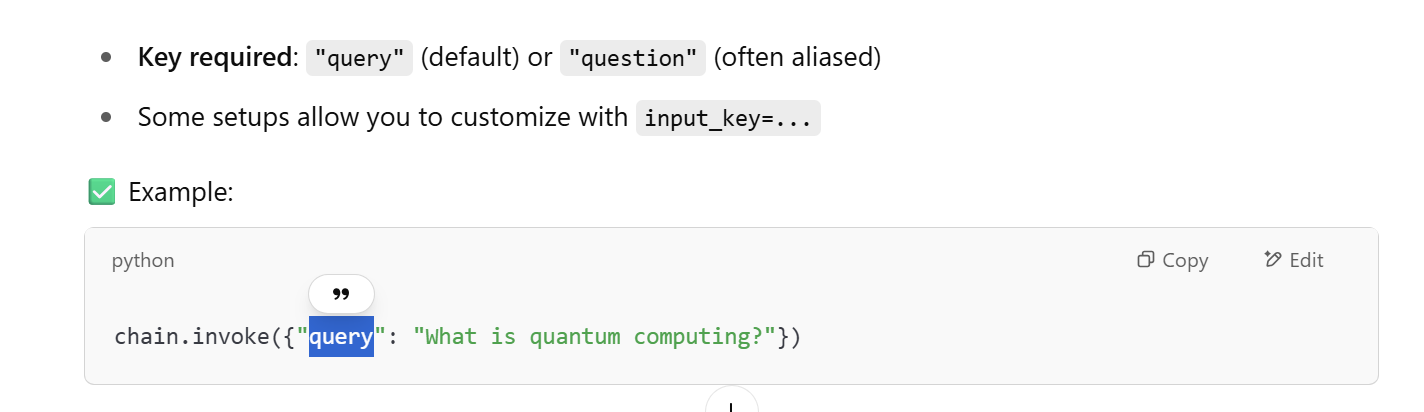

In [ ]:
from langchain.chains import RetrievalQA

In [ ]:
qa = RetrievalQA.from_chain_type(llm=llm,chain_type='stuff',retriever=retriever)

In [ ]:
qa.invoke({"query":"Who is Donald Trump"})

{'query': 'Who is Donald Trump',
 'result': 'Donald John Trump is an American politician, media personality, and businessman who is the 47th president of the United States. He previously served as the 45th president from 2017 to 2021. A member of the Republican Party, Trump was born on June 14, 1946, in Queens, New York City, and graduated from the University of Pennsylvania with a bachelor\'s degree in economics. He became president of his family\'s real estate business, renamed it the Trump Organization, and engaged in various business ventures, including real estate development and licensing his name for products and businesses. Trump gained fame as the host of the reality television show "The Apprentice" from 2004 to 2015. He is known for his controversial remarks and actions, which have drawn significant attention and criticism.'}

# LLMChain

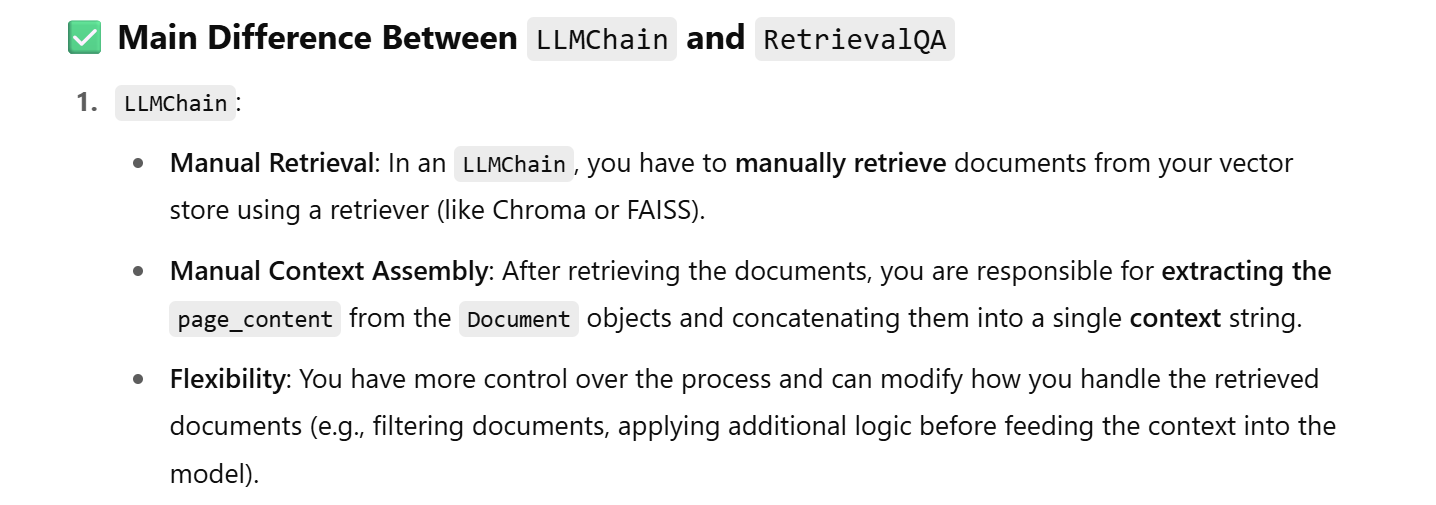

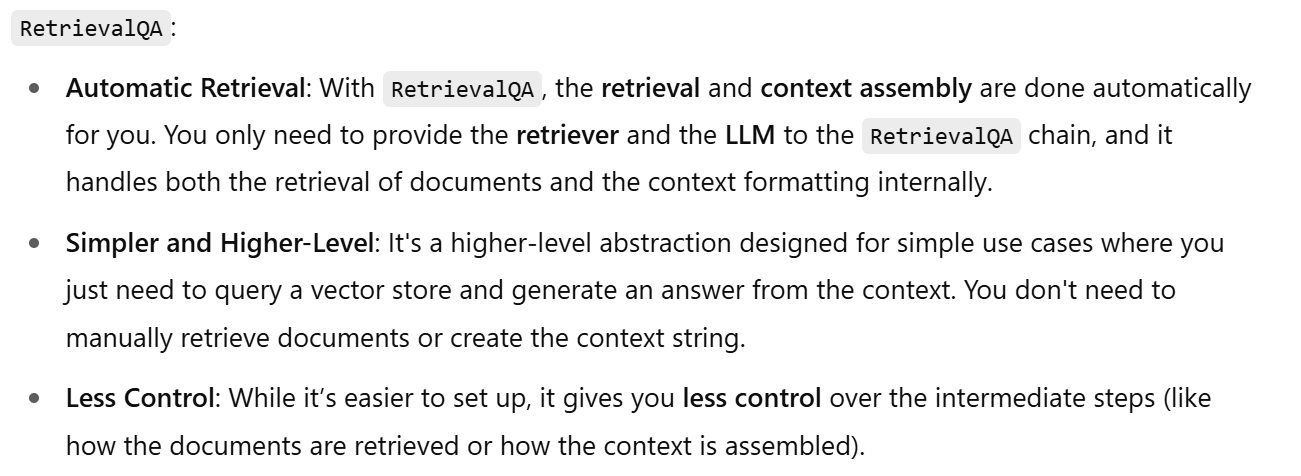

In [ ]:
from langchain.chains import LLMChain

In [ ]:
docs[0]

Document(metadata={}, page_content="Donald John Trump (born June 14, 1946) is an American politician, media personality, and businessman who is the 47th president of the United States. A member of the Republican Party, he served as the 45th president from 2017 to 2021.\n\nBorn into a wealthy family in the New York City borough of Queens, Trump graduated from the University of Pennsylvania in 1968 with a bachelor's degree in economics. He became the president of his family's real estate business in 1971, renamed it the Trump Organization, and began acquiring and building skyscrapers, hotels, casinos, and golf courses. He launched side ventures, many licensing the Trump name, and filed for six business bankruptcies in the 1990s and 2000s. From 2004 to 2015, he hosted the reality television show The Apprentice, bolstering his fame as a billionaire. Presenting himself as a political outsider, Trump won the 2016 presidential election against the Democratic Party's nominee, Hillary Clinton")

In [ ]:
from langchain.prompts import ChatPromptTemplate
template = ''' You are an expert historian. Based on the
{context}
Answer the following question
{query}
Answer:'''

In [ ]:
prompt = ChatPromptTemplate.from_template(template)

In [ ]:
question = "How old is Donald Trump?"

In [ ]:
docs = retriever.get_relevant_documents(question)

<ipython-input-91-6ed304eeafec>:1: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriever.get_relevant_documents(question)


In [ ]:
context = "\n\n".join([doc.page_content for doc in docs])

In [ ]:
result = qa.invoke({"query":"Who is Donald Trump","context":context})
result

{'query': 'Who is Donald Trump',
 'context': 'Donald John Trump (born June 14, 1946) is an American politician, media personality, and businessman who is the 47th president of the United States. A member of the Republican Party, he served as the 45th president from 2017 to 2021.\n\nBorn into a wealthy family in the New York City borough of Queens, Trump graduated from the University of Pennsylvania in 1968 with a bachelor\'s degree in economics. He became the president of his family\'s real estate business in 1971, renamed it the Trump Organization, and began acquiring and building skyscrapers, hotels, casinos, and golf courses. He launched side ventures, many licensing the Trump name, and filed for six business bankruptcies in the 1990s and 2000s. From 2004 to 2015, he hosted the reality television show The Apprentice, bolstering his fame as a billionaire. Presenting himself as a political outsider, Trump won the 2016 presidential election against the Democratic Party\'s nominee, Hill

# MapReduceDocumentsChain

In [114]:
from langchain.chains import MapReduceDocumentsChain,ReduceDocumentsChain

In [122]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=bdeae6c94f7a8b2b37b9453ed5d060feb8ba5192e2177f8652e1ce784405e865
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia


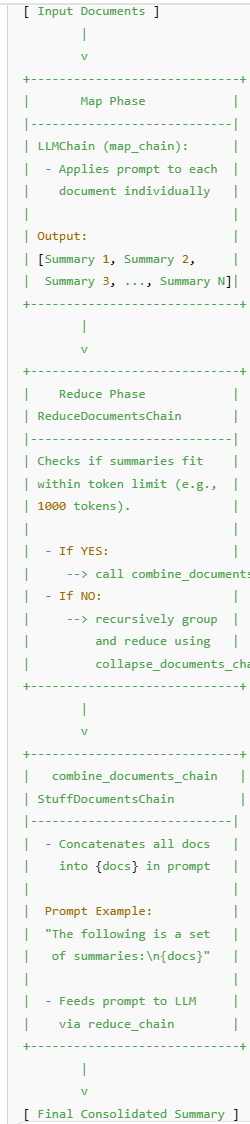

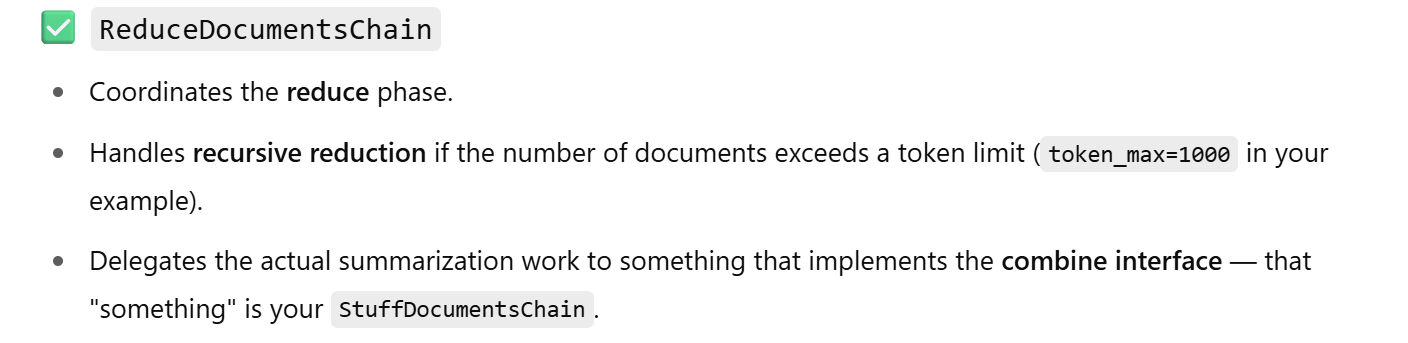

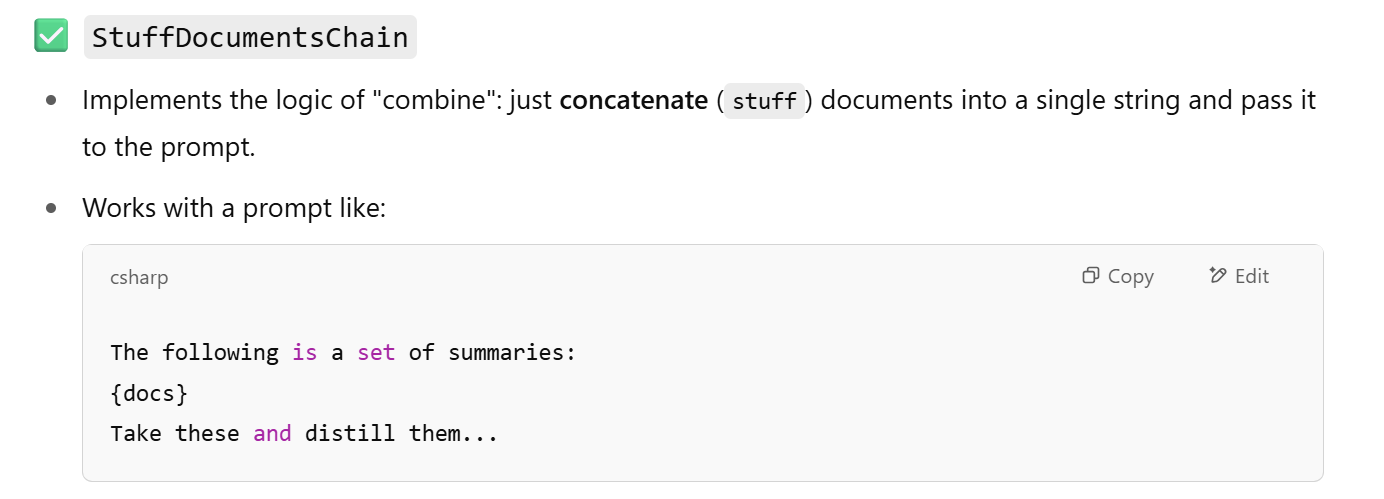

In [129]:
import wikipedia                                                    # fetching the article
from langchain.text_splitter import CharacterTextSplitter           # splitting text
from langchain_core.documents import Document                       # document wrapper
from langchain.chat_models import ChatOpenAI                        # chat LLM
from langchain.chains.llm import LLMChain                           # basic LLMChain
from langchain.chains import MapReduceDocumentsChain, ReduceDocumentsChain  # map-reduce
from langchain.chains.combine_documents.stuff import StuffDocumentsChain     # combiner
from langchain_core.prompts import ChatPromptTemplate               # chat prompt

# Load & Split the Wikipedia Article

In [130]:
# Fetch the full “Donald Trump” page
article_text = wikipedia.page("Donald Trump").content

# Split into ~500-token chunks with minimal context overlap
splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
docs = splitter.split_text(article_text)     # List[str] chunks
documents = [Document(page_content=chunk) for chunk in docs]
documents

[Document(metadata={}, page_content="Donald John Trump (born June 14, 1946) is an American politician, media personality, and businessman who is the 47th president of the United States. A member of the Republican Party, he served as the 45th president from 2017 to 2021.\nBorn into a wealthy family in the New York City borough of Queens, Trump graduated from the University of Pennsylvania in 1968 with a bachelor's degree in economics. He became the president of his family's real estate business in 1971, renamed it the Trump Organization, and began acquiring and building skyscrapers, hotels, casinos, and golf courses. He launched side ventures, many licensing the Trump name, and filed for six business bankruptcies in the 1990s and 2000s. From 2004 to 2015, he hosted the reality television show The Apprentice, bolstering his fame as a billionaire. Presenting himself as a political outsider, Trump won the 2016 presidential election against the Democratic Party's nominee, Hillary Clinton.\n

In [136]:
llm = ChatOpenAI(model="gpt-4o-mini",temperature=0)

# Define the Map (Summarization) Chain

In [137]:
# Map template: summarize each chunk
map_template = "Write a concise summary of the following: {docs}."
map_prompt = ChatPromptTemplate.from_template(map_template)
map_chain = LLMChain(llm=llm, prompt=map_prompt)

# Define the Reduce (Combine) Chain

In [138]:
# Reduce template: consolidate all chunk summaries
reduce_template = """
The following is a set of summaries:
{docs}
Take these and distill them into a final, consolidated summary of the main themes.
"""
reduce_prompt = ChatPromptTemplate.from_template(reduce_template)
reduce_chain = LLMChain(llm=llm, prompt=reduce_prompt)

# Wrap in a StuffDocumentsChain so it implements the combine API
combine_documents_chain = StuffDocumentsChain(
    llm_chain=reduce_chain,
    document_variable_name="docs"
)


# Build the ReduceDocumentsChain

In [133]:
reduce_documents_chain = ReduceDocumentsChain(
    combine_documents_chain=combine_documents_chain,
    collapse_documents_chain=combine_documents_chain,
    token_max=1000
)

# Assemble the MapReduceDocumentsChain

In [134]:
map_reduce_chain = MapReduceDocumentsChain(
    llm_chain=map_chain,
    reduce_documents_chain=reduce_documents_chain,
    document_variable_name="docs",
    return_intermediate_steps=False
)

# Invoke & Print the Final Summary

In [135]:
result = map_reduce_chain.invoke(documents)
print(result["output_text"])

Donald Trump's career and presidency were marked by controversies, divisive policies, and authoritarian tendencies. His administration implemented protectionist trade policies, hardline immigration stances, and America-first foreign relations. Trump's post-presidency saw continued legal challenges and a dominant presence in the Republican Party. His personal habits include abstaining from alcohol, cigarettes, and drugs, with golf as his main form of exercise. Trump's rhetoric, conspiracy theories, and attempts to control information fueled support from certain voter groups while drawing widespread criticism for his divisive views on race, gender, and democracy.
